<a href="https://colab.research.google.com/github/EZSib/data_-analytics2023/blob/main/Efim_App_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Импорт данных

In [ ]:
!gdown --id 1dl4eaNZ-HL0OfKzCM65-jD-yOjnWhqpi

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dl4eaNZ-HL0OfKzCM65-jD-yOjnWhqpi
To: /content/App_Rent.csv
100% 2.65k/2.65k [00:00<00:00, 16.0MB/s]


In [ ]:
df = pd.read_csv("App_Rent.csv", sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,15000,35.0,5,1,3,1,1
1,16500,31.0,2,1,2,0,1
2,18000,30.0,4,1,3,1,1
3,30000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,28500,54.0,1,2,1,1,1
127,19500,54.0,3,2,2,0,1
128,10500,12.0,4,1,3,1,0
129,19500,68.0,4,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       130 non-null    int64  
 1   s          130 non-null    float64
 2   floor      130 non-null    int64  
 3   rooms      130 non-null    int64  
 4   district   130 non-null    int64  
 5   walls      130 non-null    int64  
 6   furniture  130 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.2 KB


# Предварительная обработка

## Гистограммы

<Axes: >

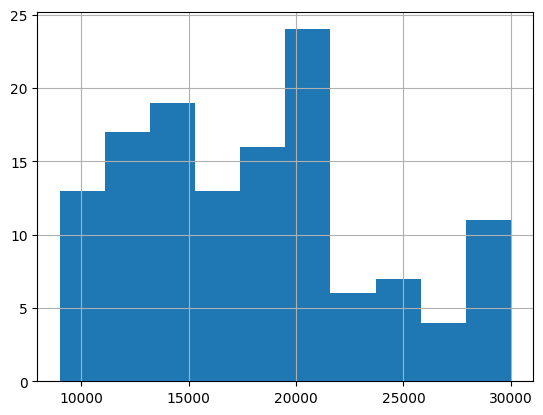

In [ ]:
df['rent'].hist()

<Axes: >

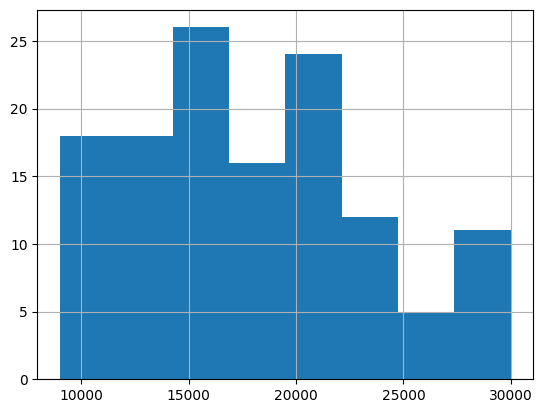

In [ ]:
df['rent'].hist(bins=8)

<Axes: >

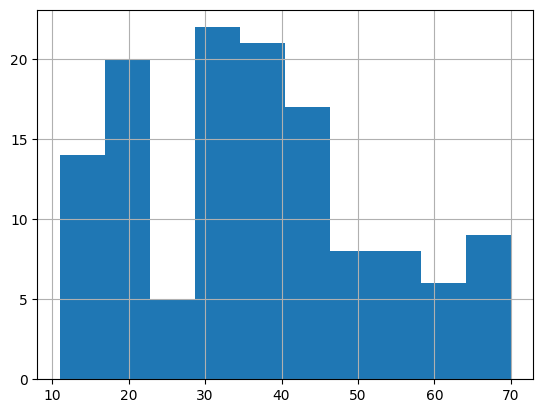

In [ ]:
df['s'].hist()

<Axes: >

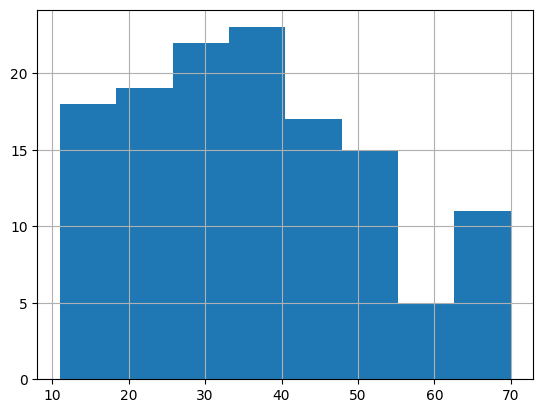

In [ ]:
df['s'].hist(bins=8)

## Описательные статистики

In [ ]:
df.drop(['floor','walls','furniture','district'],axis=1).describe()

,rent,s,rooms
count,130.000000,130.000000,130.000000
mean,17890.384615,36.439231,1.376923
std,5608.686840,15.753831,0.613358
min,9000.000000,11.000000,1.000000
25%,13500.000000,21.250000,1.000000
50%,18000.000000,36.000000,1.000000
75%,21000.000000,45.000000,2.000000
max,30000.000000,70.000000,3.000000


In [ ]:
df[['rent','s']].mean() # среднее

rent    17890.384615
s          36.439231
dtype: float64

In [ ]:
df[['rent','s']].std()  # средне квадратическое отклонение

rent    5608.686840
s         15.753831
dtype: float64

In [ ]:
df[['rent','s']].skew() # коэффициент асимметрии - соответсвие формы распределения гаусовскому(нормальному) колокольчику

rent    0.536873
s       0.328439
dtype: float64

чем ближе к 0 тем ближе к нормальному распределению. в данном случае будет левосторонее отклонение 

In [ ]:
df[['rent','s']].kurtosis() # коэффициент эксцесса - соответсвие формы распределения гаусовскому(нормальному) колокольчику

rent   -0.350727
s      -0.706654
dtype: float64

чем ближе к 0 тем ближе к нормальному распределению. в данном случае плосковершинный эксцесс

## Проверка нормальности по критерию Шапиро-Уилка

In [ ]:
stats.shapiro(df['rent']) #проверка гипотезы о нормальном распределении

ShapiroResult(statistic=0.9490651488304138, pvalue=9.61164478212595e-05)

пи-велью меньше чем уровень значимисти - значит гитопезща о нормальном распределении отклоняется

In [ ]:
stats.shapiro(df['s']) #проверка гипотезы о нормальном распределении

ShapiroResult(statistic=0.9606573581695557, pvalue=0.0008220362360589206)

аналогично т.к. меньше чем 0.05

# Сравнение групп

## Анализ влияния категориальных признаков на количественные показатели. Критерии сравнения групп

### Влияние на целевой показатель Rent

In [ ]:
df.groupby('walls')[['rent']].mean()

,rent
walls,
0,17790.000
1,17953.125


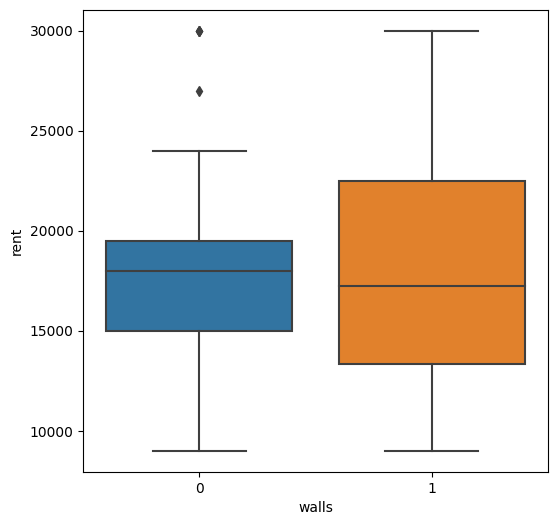

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=df)

In [ ]:
df_w0 = df[df['walls']==0]
df_w1 = df[df['walls']==1]
print(stats.shapiro(df_w0['rent']))
print(stats.shapiro(df_w1['rent']))

ShapiroResult(statistic=0.933836817741394, pvalue=0.007742355111986399)
ShapiroResult(statistic=0.9406318664550781, pvalue=0.0010412109550088644)


т.к. п-велью меньше чем 0.05 - распределение не нормальное

In [ ]:
#scipy.stats.ttest_ind(df_w0['rent'],df_w1['rent']) - если нормальный закон распределения можно применить
scipy.stats.mannwhitneyu(df_w0['rent'],df_w1['rent'])

MannwhitneyuResult(statistic=2046.5, pvalue=0.8251982325544291)

т.к. п-велью больше чем 0.05 мы не можем отклонить 0ую гипотезу и приходим к выводу, что статистические отклонения не значимы.

In [ ]:
df.groupby('furniture')[['rent']].mean()

,rent
furniture,
0,12535.714286
1,18922.018349


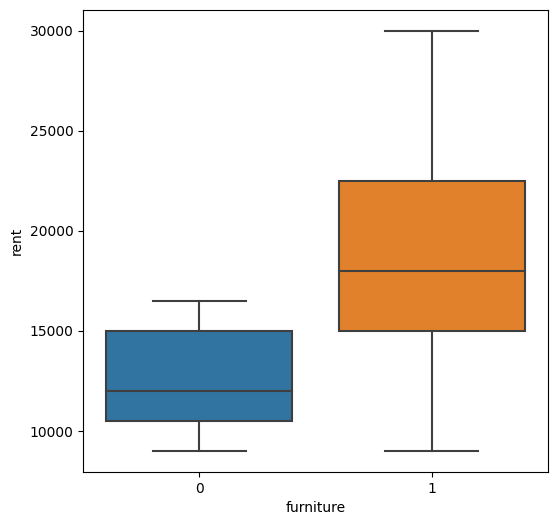

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='rent', data=df)

In [ ]:
df_f0 = df[df['furniture']==0]
df_f1 = df[df['furniture']==1]
print(stats.shapiro(df_f0['rent']))
print(stats.shapiro(df_f1['rent']))

ShapiroResult(statistic=0.8862565159797668, pvalue=0.019116604700684547)
ShapiroResult(statistic=0.9571584463119507, pvalue=0.001457675127312541)


т.к. п-велью меньше чем 0.05 - распределение не нормальное

In [ ]:
#scipy.stats.ttest_ind(df_f0['rent'],df_f1['rent'])
scipy.stats.mannwhitneyu(df_f0['rent'],df_f1['rent'])

MannwhitneyuResult(statistic=325.5, pvalue=2.0462013181855786e-07)

данное отличие статистически значимое

In [ ]:
df.groupby('district')[['rent']].mean()

,rent
district,
1,19894.736842
2,15375.000000
3,18609.375000


In [ ]:
df.groupby('district')[['rent']].count()

,rent
district,
1,38
2,44
3,48


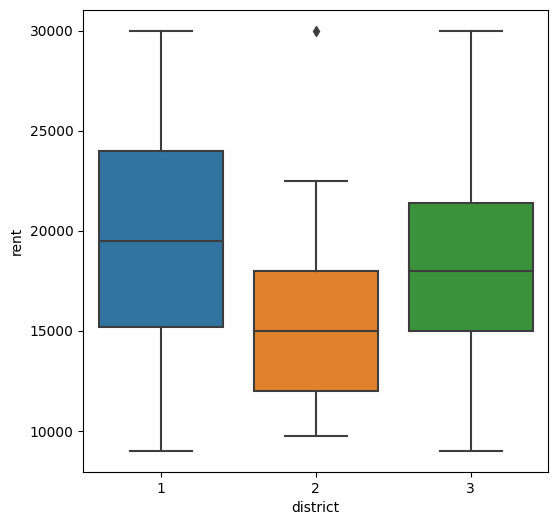

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=df)

In [ ]:
df.loc[(df['rent'] > 25000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,30000,64.0,3,3,2,0,1


In [ ]:
df=df.drop(df.index[[37]])

In [ ]:
df_d1=np.array(df[df['district']==1]['rent'])
df_d2=np.array(df[df['district']==2]['rent'])
df_d3=np.array(df[df['district']==3]['rent'])

In [ ]:
print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))

ShapiroResult(statistic=0.9700818657875061, pvalue=0.3938768208026886)
ShapiroResult(statistic=0.9333935976028442, pvalue=0.015224754810333252)
ShapiroResult(statistic=0.9480535984039307, pvalue=0.03346915543079376)


1 - нормальное <br>
2 - не нормальное<br>
3 - не нормальное

In [ ]:
#stats.f_oneway(df_d1,df_d2,df_d3) # One way ANOVA - если все нормальные
stats.mstats.kruskalwallis(df_d1,df_d2,df_d3)

KruskalResult(statistic=16.52600709960518, pvalue=0.00025788326161446976)

влияние статистически значимое, район города сильно влият на стоймость ренты

### Влияние категориальных признаков на факторный показатель s (площадь)

In [ ]:
df.groupby('walls')[['s']].mean()

,s
walls,
0,39.042857
1,34.500000


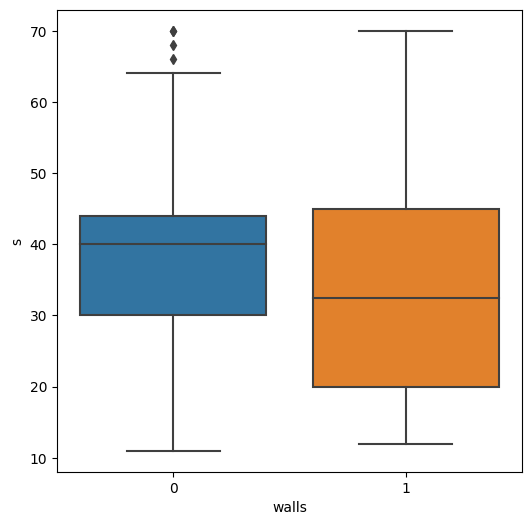

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='s', data=df)

In [ ]:
print(stats.shapiro(df_w0['s']))
print(stats.shapiro(df_w1['s']))

ShapiroResult(statistic=0.9625374674797058, pvalue=0.11355537921190262)
ShapiroResult(statistic=0.9499643445014954, pvalue=0.0034307457972317934)


1 - нормальное распределение <br>
2- не нормальное 

In [ ]:
scipy.stats.mannwhitneyu(df_f0['s'],df_f1['s'])

MannwhitneyuResult(statistic=407.5, pvalue=3.1081716140374413e-06)

In [ ]:
df.groupby('furniture')[['s']].mean()

,s
furniture,
0,21.904762
1,39.010185


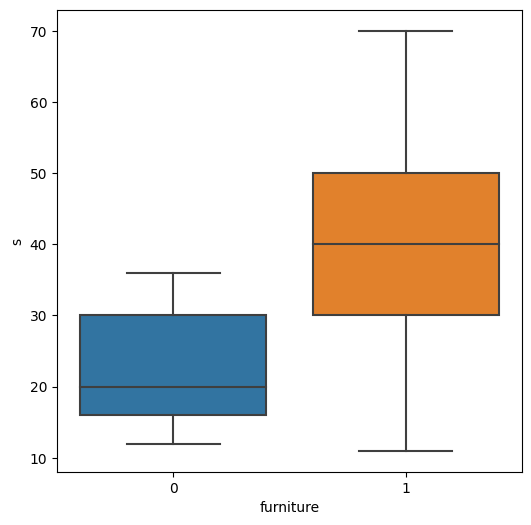

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='s', data=df)

In [ ]:
scipy.stats.mannwhitneyu(df_f0['s'],df_f1['s'])

MannwhitneyuResult(statistic=407.5, pvalue=3.1081716140374413e-06)

In [ ]:
df.groupby('district')[['s']].mean()

,s
district,
1,37.078947
2,32.711628
3,38.697917


In [ ]:
df_s_d1=np.array(df[df['district']==1]['s'])
df_s_d2=np.array(df[df['district']==2]['s'])
df_s_d3=np.array(df[df['district']==3]['s'])

In [ ]:
print(stats.shapiro(df_s_d1))
print(stats.shapiro(df_s_d2))
print(stats.shapiro(df_s_d3))

ShapiroResult(statistic=0.9786481857299805, pvalue=0.6694725155830383)
ShapiroResult(statistic=0.9183208346366882, pvalue=0.004724521655589342)
ShapiroResult(statistic=0.9602149128913879, pvalue=0.10299959033727646)


In [ ]:
stats.mstats.kruskalwallis(df_s_d1,df_s_d2,df_s_d3)

KruskalResult(statistic=3.548655042768554, pvalue=0.1695974618261066)

данные показатели не связаны т.к. п -велью больше чем 0.05

# Корреляционный анализ

## Анализ связиколичественных и порядковых признаков

<Axes: xlabel='s', ylabel='rent'>

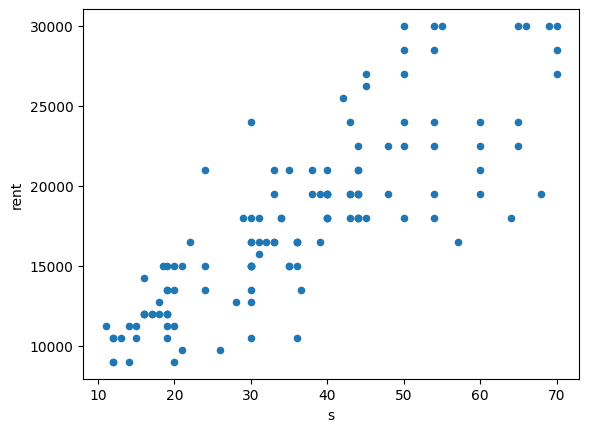

In [ ]:
df.plot("s",'rent',kind="scatter")

<Axes: xlabel='rooms', ylabel='rent'>

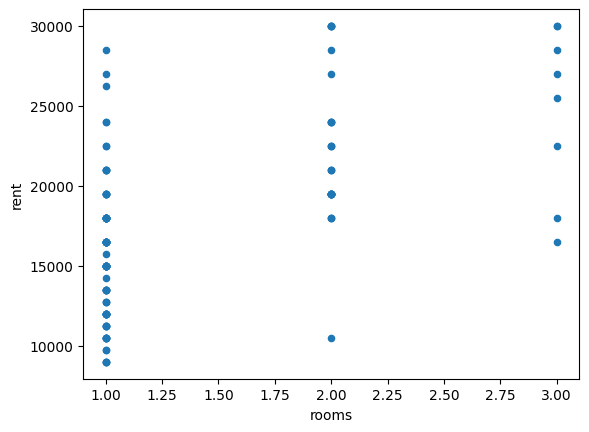

In [ ]:
df.plot('rooms','rent',kind="scatter")

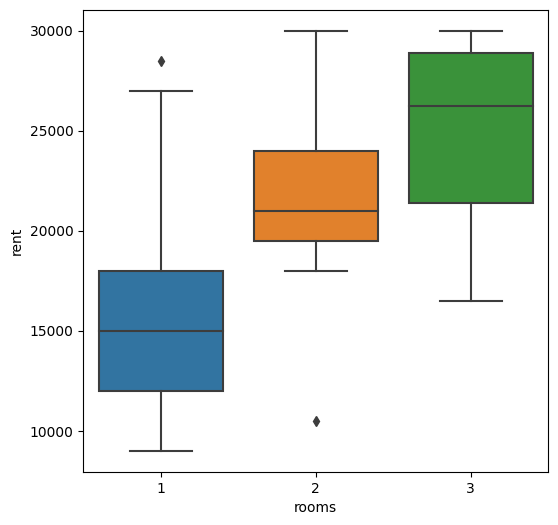

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=df)

In [ ]:
df[['rent','s','rooms']].corr(method='pearson') # количественная корреляция Пирсона

,rent,s,rooms
rent,1.000000,0.829281,0.592777
s,0.829281,1.000000,0.730449
rooms,0.592777,0.730449,1.000000


In [ ]:
df[['rent','s','rooms']].corr() # то же самое

,rent,s,rooms
rent,1.000000,0.829281,0.592777
s,0.829281,1.000000,0.730449
rooms,0.592777,0.730449,1.000000


In [ ]:
df[['rent','s','rooms','floor']].corr(method='spearman') # ранговая корреляция Спирмена

,rent,s,rooms,floor
rent,1.000000,0.857035,0.599251,0.383969
s,0.857035,1.000000,0.715424,0.413951
rooms,0.599251,0.715424,1.000000,0.158063
floor,0.383969,0.413951,0.158063,1.000000


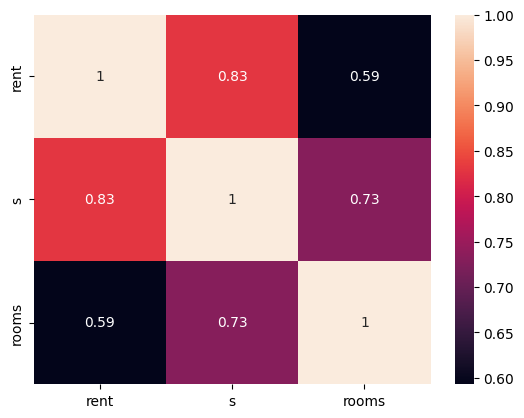

In [ ]:
num = ['rent', 's', 'rooms']
hm = sns.heatmap(df[num].corr(),annot=True)

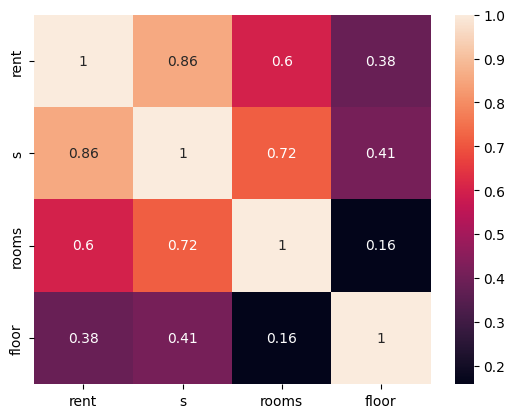

In [ ]:
ran = ['rent', 's','rooms','floor']
hm = sns.heatmap(df[ran].corr(method = 'spearman'), annot=True)

In [ ]:
scipy.stats.pearsonr(df.rent, df.s)

PearsonRResult(statistic=0.8292807418898439, pvalue=6.81881003369234e-34)

In [ ]:
scipy.stats.pearsonr(df.rent, df.rooms)

PearsonRResult(statistic=0.5927766527431145, pvalue=1.3536048086725475e-13)

In [ ]:
scipy.stats.spearmanr(df.rent, df.floor)

SignificanceResult(statistic=0.38396878193353856, pvalue=7.0550083304872275e-06)

In [ ]:
scipy.stats.pearsonr(df.s, df.rooms)

PearsonRResult(statistic=0.7304486159283049, pvalue=8.943660271030709e-23)

## Связь категориальных признаков

In [ ]:
WF=pd.crosstab(df['walls'],df['furniture']); WF

furniture,0,1
walls,,
0,7,42
1,14,66


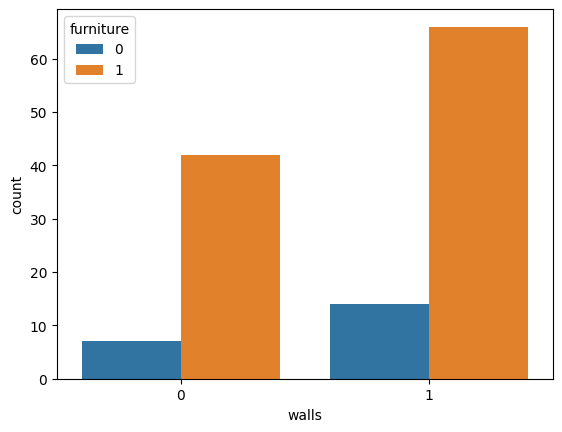

In [ ]:
sns.countplot(x=df['walls'], hue=df['furniture']);

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, f, prob))

test Statistics: 0.054879585762876604
degrees of freedom: 1
p-value: 0.8147800917238359



In [ ]:
WD=pd.crosstab(df['walls'],df['district']); WD

district,1,2,3
walls,,,
0,9,23,17
1,29,20,31


<Axes: xlabel='district', ylabel='count'>

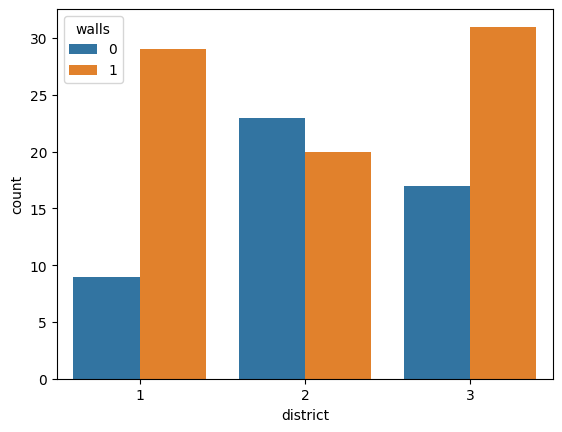

In [ ]:
sns.countplot(x=df['district'], hue=df['walls'])

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, f, prob))

test Statistics: 7.820993051825996
degrees of freedom: 2
p-value: 0.020030552903560955



# Регрессионный анализ

## Парная регресия

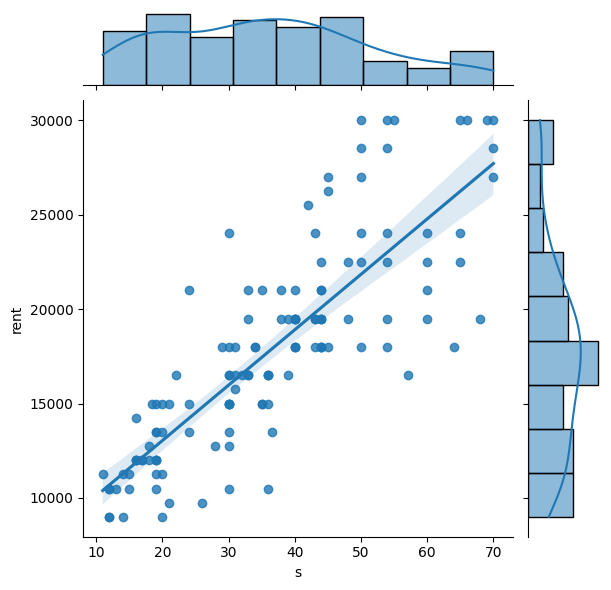

In [ ]:
#sns.set(style="darkgrid")
sns.jointplot(x='s', y='rent', data=df, kind="reg")

In [ ]:
LR = lm.LinearRegression()

In [ ]:
mod1 = LR.fit(df[['s']],df[['rent']])

In [ ]:
mod1.intercept_, mod1.coef_

(array([7169.9792472]), array([[293.3433218]]))

интерсепт в данном случае это свободный коэф. - сколько денег отдпть за сам факт аренды <br>
а сам коэф. это цена руб.за кв.метр

In [ ]:
r2 = mod1.score(df[['s']],df[['rent']])
r2

0.68770654886937

оценка адекватности модели (детерминированность) - примерно на 69% влияет данный показатель, остальное шум и прочее

## Парная регрессия (OLS). Статистический подход.

метод наименьших квадратов

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
results1 = smf.ols('rent ~ s', data=df).fit() # в аргументах функции задается формула связи которую мы будем оценивать
results1.summary() # результаты

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     279.7
Date:                Tue, 30 May 2023   Prob (F-statistic):           6.82e-34
Time:                        17:09:07   Log-Likelihood:                -1219.1
No. Observations:                 129   AIC:                             2442.
Df Residuals:                     127   BIC:                             2448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7169.9792    691.601     10.367      0.000    5801.426    8538.532
s            293.3433     17.541     16.723      0.000     258.633     328.054
==============================================================================
Omnibus:                        4.016   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.936
Skew:                           0.233   Prob(JB):                        0.140
Kurtosis:                       3.718   Cond. No.                         99.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:	0.688 <br> - значение полученное по методу квадратов
R-squared:	0.685 <br> - скорректированный коэф. детерминации
F-statistic:	279.7 <br> 
Prob (F-statistic):	6.82e-34 <br> - - статистика фишера, пи-велью намного ниже чем значимость, а так же 69% детерминантность говорит о том что это хорошая модель
Intercept	7169.9792	691.601	10.367	0.000	5801.426	8538.532 <br>
s	293.3433	17.541	16.723	0.000	258.633	328.054 <br> - среднее квардратическое отклонение, 95 % доверительный интервал
Durbin-Watson:	1.879 <br> - статистика Дарбина - Вотсана принимает значения от 0 до 4 , если знач. близки к 0 - значит прямая корреляция если близка к 4 значит в  последовательности обратная корреляция если около 2 значит корреляции нет
Prob(Omnibus):	0.134	Jarque-Bera (JB):	3.936 <br>
Skew:	0.233 - коэф. ассиметрии сравнивается с 0<br>	Prob(JB):	0.140 -пивелью больше нуля значит не отклоняем гипотезу нормальных остатков<br>
Kurtosis:	3.718 - коэф. эксцесса- здесь кеф должен српвниваться с 3 <br>		Cond. No.	99.9 <br>


## МНОЖЕСТВЕННАЯ РЕГРЕССИЯ

In [ ]:
X=df[['s','rooms','floor','walls','furniture']] # вс готоавые целевые признаки кроме стоимости и района(его надо дополнительно кодировать)

In [ ]:
X

,s,rooms,floor,walls,furniture
0,35.0,1,5,1,1
1,31.0,1,2,0,1
2,30.0,1,4,1,1
3,55.0,2,1,1,1
...,...,...,...,...,...
126,54.0,2,1,1,1
127,54.0,2,3,0,1
128,12.0,1,4,1,0
129,68.0,2,4,0,1


In [ ]:
Y=df[['rent']] #целевая переменная 

In [ ]:
mod_m = LR.fit(X,Y) # линнейная регрессия

In [ ]:
mod_m.intercept_, mod_m.coef_

(array([5136.07119279]),
 array([[ 291.03500937, -113.95073467,  -11.82303603, 1762.70452924,
         1468.04676977]]))

In [ ]:
r2 = mod_m.score(X,Y)
r2

0.7200816693020738

кофэ. детерминации увеличился

In [ ]:
x_new_app = [[54,2,5,1,1]] #пробуем сделать прогноз [площадь, колво комнат, этаж,тип стен, фурнитура]

In [ ]:
y_new_app=mod_m.predict(x_new_app)
print("Прогноз цены: ",y_new_app.round(0))

Прогноз цены:  [[23796.]]


### Множественная регрессия (OLS)

In [ ]:
resultsm = smf.ols('rent ~ s + rooms + floor + walls + furniture' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     63.28
Date:                Tue, 30 May 2023   Prob (F-statistic):           2.27e-32
Time:                        17:09:07   Log-Likelihood:                -1212.1
No. Observations:                 129   AIC:                             2436.
Df Residuals:                     123   BIC:                             2453.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5136.0712    934.370      5.497      0.000    3286.544    6985.599
s            291.0350     28.759     10.120      0.000     234.107     347.963
rooms       -113.9507    661.936     -0.172      0.864   -1424.213    1196.311
floor        -11.8230    110.648     -0.107      0.915    -230.844     207.198
walls       1762.7045    548.487      3.214      0.002     677.008    2848.401
furniture   1468.0468    779.195      1.884      0.062     -74.322    3010.415
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.098
Skew:                           0.058   Prob(JB):                        0.952
Kurtosis:                       3.070   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

комнаты не нужны т.к. комнаты слишком коррелированны(эффект мультикореллиарности) тоже самое с этажем, значение не значимое.<br>
Фурнитуру тоже не берем т.к. пивелью у нее больше чем 0.05

In [ ]:
resultsm = smf.ols('rent ~ s + walls' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     155.6
Date:                Tue, 30 May 2023   Prob (F-statistic):           9.03e-35
Time:                        17:09:07   Log-Likelihood:                -1213.9
No. Observations:                 129   AIC:                             2434.
Df Residuals:                     126   BIC:                             2442.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5780.7436    792.223      7.297      0.000    4212.958    7348.529
s            301.2093     17.088     17.627      0.000     267.392     335.027
walls       1780.6596    547.995      3.249      0.001     696.194    2865.125
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.203
Skew:                           0.061   Prob(JB):                        0.904
Kurtosis:                       3.151   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Влияние категориальных факторов. Dummy variables

In [ ]:
df01 = pd.concat((df,pd.get_dummies(df.district, prefix="d", prefix_sep='',)),1) # с помощью ф-ции get_dummies мы добавляем 3 фиктивные переменные для того, чтбы закодировать район в 2ичной системе

In [ ]:
df01

,rent,s,floor,rooms,district,walls,furniture,d1,d2,d3
0,15000,35.0,5,1,3,1,1,0,0,1
1,16500,31.0,2,1,2,0,1,0,1,0
2,18000,30.0,4,1,3,1,1,0,0,1
3,30000,55.0,1,2,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
126,28500,54.0,1,2,1,1,1,1,0,0
127,19500,54.0,3,2,2,0,1,0,1,0
128,10500,12.0,4,1,3,1,0,0,0,1
129,19500,68.0,4,2,2,0,1,0,1,0


In [ ]:
resultsm = smf.ols('rent ~ s + walls + furniture + d1 + d2 ', data=df01).fit() # нельзя включать 3 столбец d3, задача не будет решаться корректно, оставляем 2 любых и исключаем один (выбираем как базисный т.е. он будет стоить 0)
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     84.02
Date:                Tue, 30 May 2023   Prob (F-statistic):           5.54e-38
Time:                        17:09:08   Log-Likelihood:                -1198.4
No. Observations:                 129   AIC:                             2409.
Df Residuals:                     123   BIC:                             2426.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5846.8087    918.142      6.368      0.000    4029.402    7664.215
s            272.2591     17.030     15.987      0.000     238.549     305.969
walls       1039.6924    510.858      2.035      0.044      28.481    2050.904
furniture   1696.6245    707.027      2.400      0.018     297.107    3096.142
d1          1819.9582    591.295      3.078      0.003     649.526    2990.390
d2         -1543.0576    583.148     -2.646      0.009   -2697.364    -388.751
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.305
Skew:                          -0.091   Prob(JB):                        0.858
Kurtosis:                       2.846   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_new_app = pd.array([1,40,1,1,0,0]) # Первая единица на Intercept, и остальные по очередности площадь, стены, мебель,район (если 2 нуля то третий район)

In [ ]:
rp=resultsm.params; rp

Intercept    5846.808708
s             272.259079
walls        1039.692382
furniture    1696.624516
d1           1819.958212
d2          -1543.057589
dtype: float64

In [ ]:
y_new_app=np.dot(rp,x_new_app) # скалярное произведение векторов
print('Прогноз цены:', round(y_new_app, 2))

Прогноз цены: 19473.49


### Убедимся, что комнаты все-таки влияют на арендную плату

In [ ]:
results2 = smf.ols('rent ~ rooms', data=df01).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     68.80
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.35e-13
Time:                        17:09:08   Log-Likelihood:                -1266.3
No. Observations:                 129   AIC:                             2537.
Df Residuals:                     127   BIC:                             2542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.033e+04    982.399     10.515      0.000    8385.934    1.23e+04
rooms       5472.6681    659.781      8.295      0.000    4167.080    6778.256
==============================================================================
Omnibus:                        3.962   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.559
Skew:                           0.401   Prob(JB):                        0.169
Kurtosis:                       3.140   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""